## Observations and Insights

## Dependencies and starter code

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
tumor_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
tumor_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = tumor_data.groupby("Drug Regimen").mean()[["Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)": "Mean"})
regimen_median = tumor_data.groupby("Drug Regimen").median()[["Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)": "Median"})
regiment_variance = tumor_data.groupby("Drug Regimen").var()[["Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)": "Var"})
regiment_std = tumor_data.groupby("Drug Regimen").std()[["Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)": "Stdev"})
regiment_sem = tumor_data.groupby("Drug Regimen").sem()[["Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)": "SEM"})
summary_data = pd.concat([regimen_mean, regimen_median, regiment_variance, regiment_std, regiment_sem], axis=1)
summary_data

,Mean,Median,Var,Stdev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

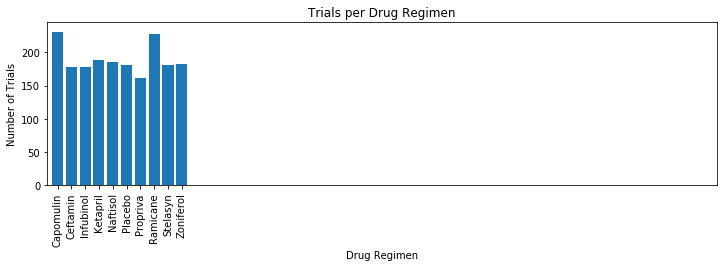

In [25]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_count = tumor_data.groupby("Drug Regimen").count()[["Mouse ID"]]
mouse_count.plot(kind="bar", figsize=(12,3), width=0.8, legend=False)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse_count["Mouse ID"])+15)
plt.title("Trials per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Trials")
plt.show()

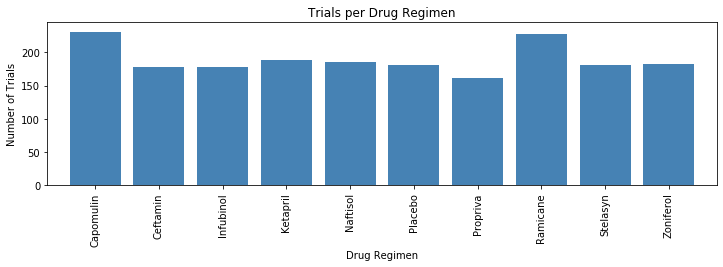

In [26]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
fig = plt.figure(figsize=(12,3))
x_axis = np.arange(len(mouse_count.index))
count_plot = plt.bar(x_axis, mouse_count["Mouse ID"], color='steelblue', alpha=1, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_count.index, rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse_count["Mouse ID"])+15)
plt.title("Trials per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Trials")
plt.show()

## Pie plots

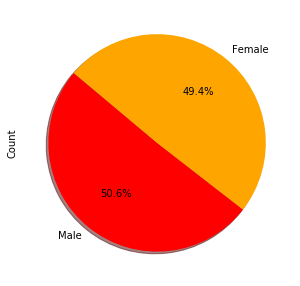

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_count = tumor_data[tumor_data["Sex"]=="Male"].count()["Mouse ID"]
female_count = tumor_data[tumor_data["Sex"]=="Female"].count()["Mouse ID"]
gender_count = pd.DataFrame({'Gender': ['Male', 'Female'], 'Count': [male_count, female_count]})
labels = ["Male", "Female"]
colors = ["red", "orange"]
plot = gender_count.plot.pie(y='Count', figsize=(5,5), labels=labels, colors=colors, legend=False, startangle=140, autopct="%1.1f%%", shadow=True)

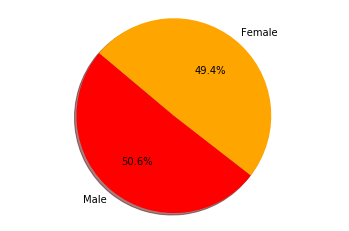

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [male_count, female_count]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
last_timepoint = tumor_data['Timepoint']==45
efficacy_data = tumor_data[last_timepoint]
efficacy_data['Efficacy'] = 45 - efficacy_data['Tumor Volume (mm3)']
regimen_data = efficacy_data.groupby('Drug Regimen').mean().sort_values('Efficacy', ascending=False)
top_treatments = ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']
top_regimens = efficacy_data.loc[efficacy_data['Drug Regimen'].isin(top_treatments)]
top_regimens

/Users/johnpatten/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Efficacy
9,k403,Ramicane,Male,21,16,45,22.050126,1,22.949874
19,s185,Capomulin,Female,3,17,45,23.343598,1,21.656402
29,x401,Capomulin,Female,16,15,45,28.484033,0,16.515967
39,m601,Capomulin,Male,22,17,45,28.430964,1,16.569036
49,g791,Ramicane,Male,11,16,45,29.128472,1,15.871528
...,...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3,-16.386660
1813,y163,Infubinol,Female,17,27,45,67.685569,3,-22.685569
1845,y769,Ceftamin,Female,6,27,45,68.594745,4,-23.594745
1855,y865,Ceftamin,Male,23,26,45,64.729837,3,-19.729837


In [30]:
quartiles = top_regimens['Efficacy'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

cap = top_regimens.loc[top_regimens['Drug Regimen']=='Capomulin']
capquartiles = cap['Efficacy'].quantile([.25,.5,.75])
caplowerq = capquartiles[0.25]
capupperq = capquartiles[0.75]
capiqr = capupperq-caplowerq

inf = top_regimens.loc[top_regimens['Drug Regimen']=='Infubinol']
infquartiles = inf['Efficacy'].quantile([.25,.5,.75])
inflowerq = infquartiles[0.25]
infupperq = infquartiles[0.75]
infiqr = infupperq-inflowerq

ram = top_regimens.loc[top_regimens['Drug Regimen']=='Ramicane']
ramquartiles = ram['Efficacy'].quantile([.25,.5,.75])
ramlowerq = ramquartiles[0.25]
ramupperq = ramquartiles[0.75]
ramiqr = ramupperq-ramlowerq

cef = top_regimens.loc[top_regimens['Drug Regimen']=='Ceftamin']
cefquartiles = cef['Efficacy'].quantile([.25,.5,.75])
ceflowerq = cefquartiles[0.25]
cefupperq = cefquartiles[0.75]
cefiqr = cefupperq-ceflowerq

print(f"The interquartile range for the top drug regimens is: {iqr}")
print(f"Capomulin has potential outliers above {capupperq} and below {caplowerq}")
print(f"Infubinol has potential outliers above {infupperq} and below {inflowerq}")
print(f"Ramicane has potential outliers above {ramupperq} and below {ramlowerq}")
print(f"Ceftamin has potential outliers above {cefupperq} and below {ceflowerq}")

The interquartile range for the top drug regimens is: 28.66218635
Capomulin has potential outliers above 12.622643160000003 and below 4.840779699999999
Infubinol has potential outliers above -17.75445141 and below -22.685568619999998
Ramicane has potential outliers above 14.018824775000002 and below 6.491694692500003
Ceftamin has potential outliers above -16.433892229999998 and below -22.52748237


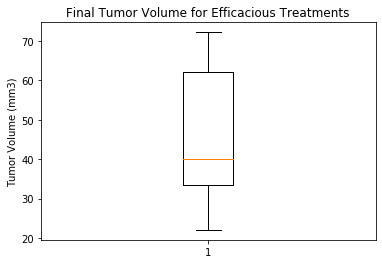

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Efficacious Treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(top_regimens['Tumor Volume (mm3)'])
plt.show()

## Line and scatter plots

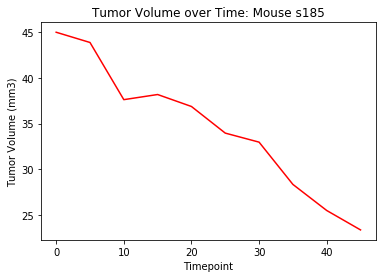

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_select = tumor_data.loc[tumor_data['Mouse ID']=='s185'][['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_volume = plt.plot(mouse_select['Timepoint'], mouse_select ['Tumor Volume (mm3)'], color="red", label="Tumor Volume (mm3)")
plt.title("Tumor Volume over Time: Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

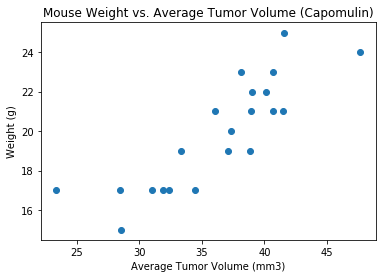

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap = top_regimens.loc[top_regimens['Drug Regimen']=='Capomulin']
cap_mean = cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
cap_mouse = cap.merge(cap_mean, on='Mouse ID')[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)_y']].rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume (mm3)"})
scatterx_limit = cap_mouse['Average Tumor Volume (mm3)'].max()
x_axis = np.arange(0, scatterx_limit, 1)
plt.scatter(x_values,y_values)
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

In [34]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
capmouse_weight = cap_mouse.iloc[:,1]
capmouse_avgtumor = cap_mouse.iloc[:,2]
correlation = st.pearsonr(capmouse_weight, capmouse_avgtumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.85


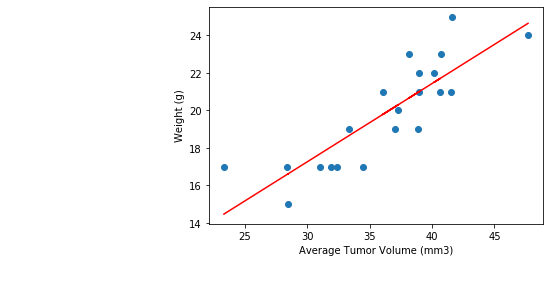

In [35]:
from scipy.stats import linregress
x_values = cap_mouse['Average Tumor Volume (mm3)']
y_values = cap_mouse['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

In [14]:
# Three observations

print(f"1. Reduction in tumor volume correlates with decrease in weight. Successful treatment usually results in weight loss.")
print(f"2. None of these drugs can be said to eliminate tumors. They reduce them.")
print(f"3. Drugs with high efficacy tend to work equally well for each gender.")

1. Reduction in tumor volume correlates with decrease in weight. Successful treatment usually results in weight loss.
2. None of these drugs can be said to eliminate tumors. They reduce them.
3. Drugs with high efficacy tend to work equally well for each gender.
